In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
from pathlib import Path
import re

main_folder = Path('GroupD/')

# Make an empty list to store dataframes
all_dataframes = []

# Loop through all subfolders within the main folder
for subfolder in main_folder.iterdir():         # Loading in each file name and making it *pretty*
    if subfolder.is_dir():
        if any(task in subfolder.name for task in ['Task_2', 'Task_3', 'Task_4', 'Task_5']):
            file_name_slice = slice(5 if 'Task_2' in subfolder.name or 'Task_3' in subfolder.name or 'Task_4' in subfolder.name else 6, None)
        else:
            continue  # Skip any irrelevant folders

        # Loop through all CSV files within the subfolder
        for csv_file in subfolder.glob('*.csv'):
            try:
                df = pd.read_csv(csv_file, encoding='ISO-8859-1', skiprows=3, usecols=[0, 1], names=['Frequency', 'Amplitude'])
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")  # Skip to the next file if there's an error
                continue

            # Add metadata columns for reference later
            df['source_folder'] = subfolder.name
            df['source_folder_label'] = subfolder.name.replace('_', ' ')
            df['source_file'] = csv_file.stem[file_name_slice]  # Use part-specific slice
            df['source_file_label'] = csv_file.stem[file_name_slice].replace('_', ' ')

            # Append the dataframe to the list
            all_dataframes.append(df)

# Concatenate all the dataframes into one dataframe
combined_df = pd.concat(all_dataframes, ignore_index=True)

# Display combined dataframe to check structure
print(combined_df)

          Frequency  Amplitude source_folder source_folder_label  \
0      2.500000e+08 -63.231033        Task_2              Task 2   
1      2.506250e+08 -64.149903        Task_2              Task 2   
2      2.512500e+08 -63.539280        Task_2              Task 2   
3      2.518750e+08 -63.311940        Task_2              Task 2   
4      2.525000e+08 -63.601933        Task_2              Task 2   
...             ...        ...           ...                 ...   
48025  1.247500e+09 -27.475421        Task_5              Task 5   
48026  1.248125e+09 -27.103419        Task_5              Task 5   
48027  1.248750e+09 -27.209271        Task_5              Task 5   
48028  1.249375e+09 -26.852253        Task_5              Task 5   
48029  1.250000e+09 -27.547581        Task_5              Task 5   

              source_file   source_file_label  
0                Thru_S11            Thru S11  
1                Thru_S11            Thru S11  
2                Thru_S11            Th

In [134]:
# Define the function to extract numeric value from the filename for sorting
def extract_numeric(filename):
    match = re.search(r'(\d+)', filename)  # Find the first sequence of digits
    return int(match.group(0)) if match else float('inf')  # Return a large number if no digits found

# Plotting function
def plot_individual_files(dataframe, source_folder_label):
    color_map = {
        'Task 2': 'blue',
        'Task 3': 'green',
        'Task 4': 'darkgoldenrod',
        'Task 5': 'purple'
}
    # Get the color for the specified source_folder_label, default to red if not in map
    color = color_map.get(source_folder_label, 'red')

    # Filter the dataframe for the specified part type
    part_df = dataframe[dataframe['source_folder_label'] == source_folder_label]

    for file_name, file_df in part_df.groupby('source_file_label'):
        plt.figure(figsize=(10, 6))
        plt.plot(file_df['Frequency'], file_df['Amplitude'], label=f"{file_name}", color=color)
        plt.xlabel('Frequency (Hz)', fontsize=14)
        plt.xscale('log')
        plt.ylabel('Amplitude (dBm)', fontsize=14)
        plt.title(f'{source_folder_label}: {file_name.replace("_", " ")} Data', fontsize=14)
        plt.tick_params(axis='both', which='both', labelsize=14)
        #plt.legend(fontsize=14)
        plt.grid(True)
        plt.show()

# Task 2: Measure response of Calibration Fixtures

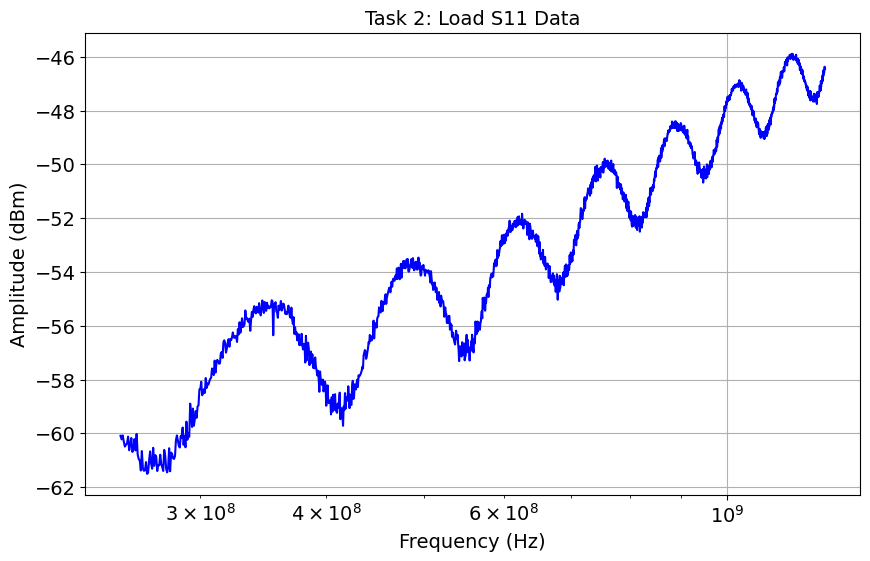

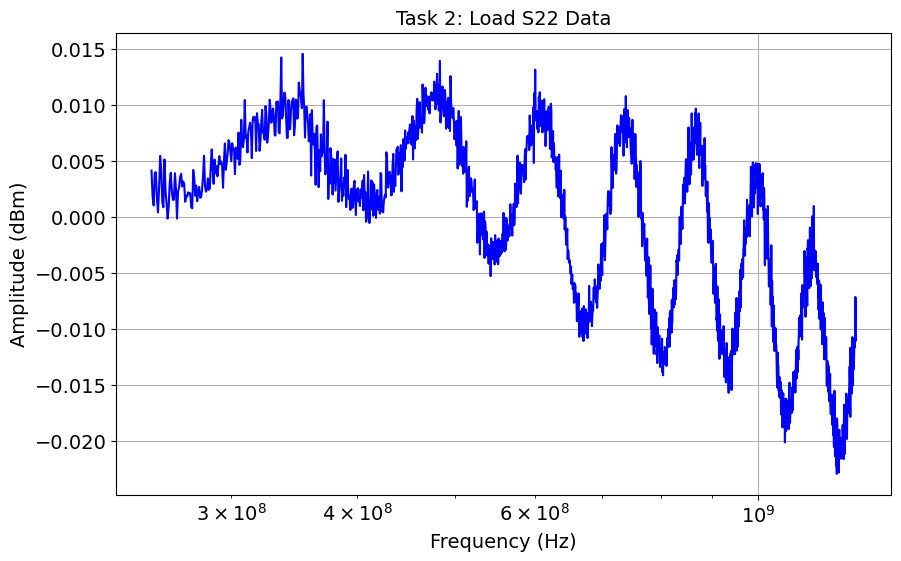

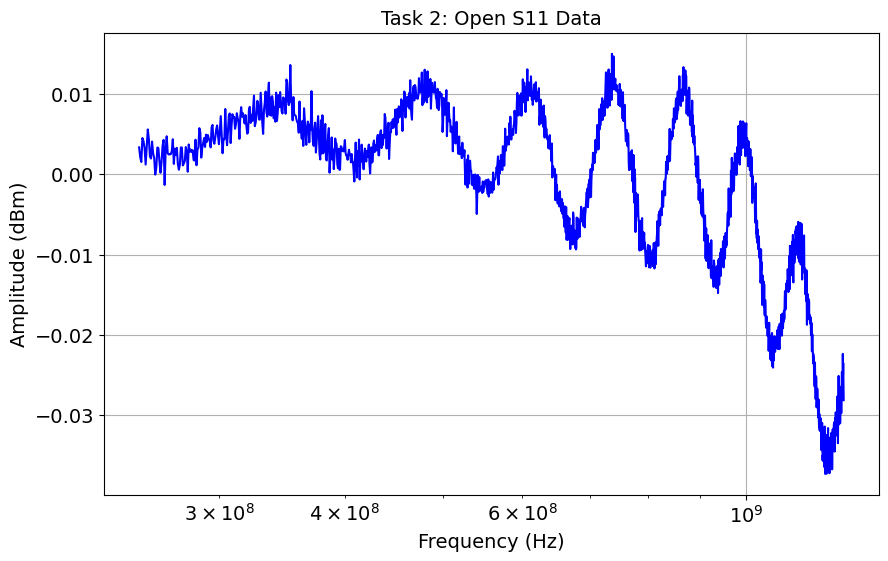

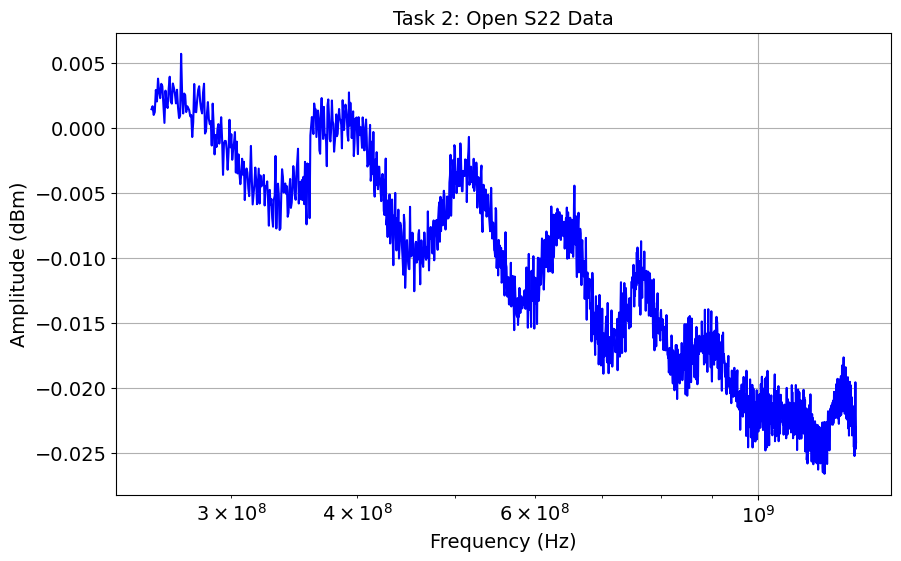

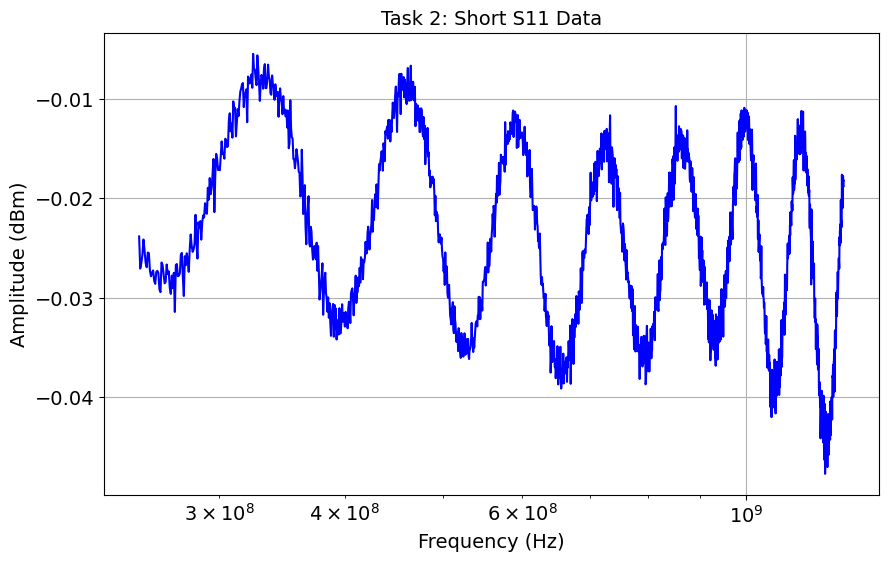

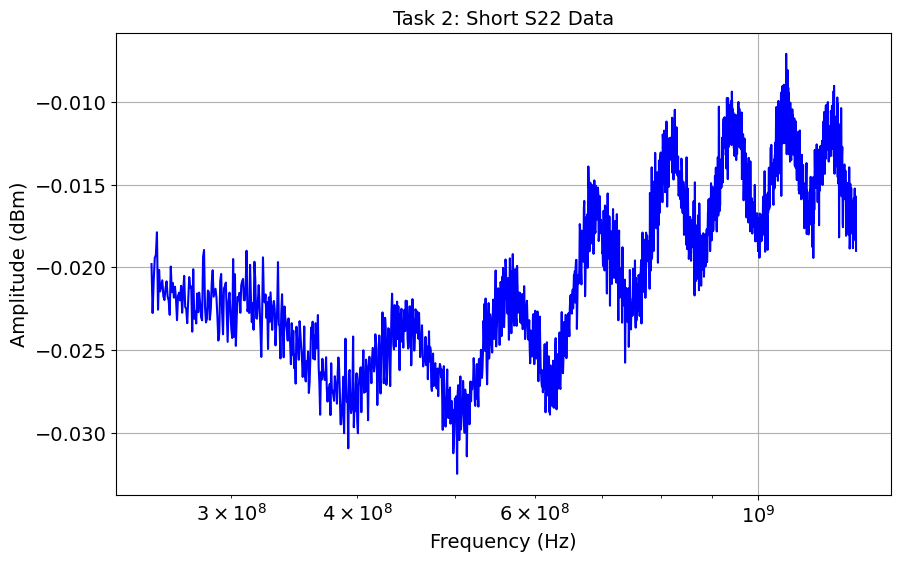

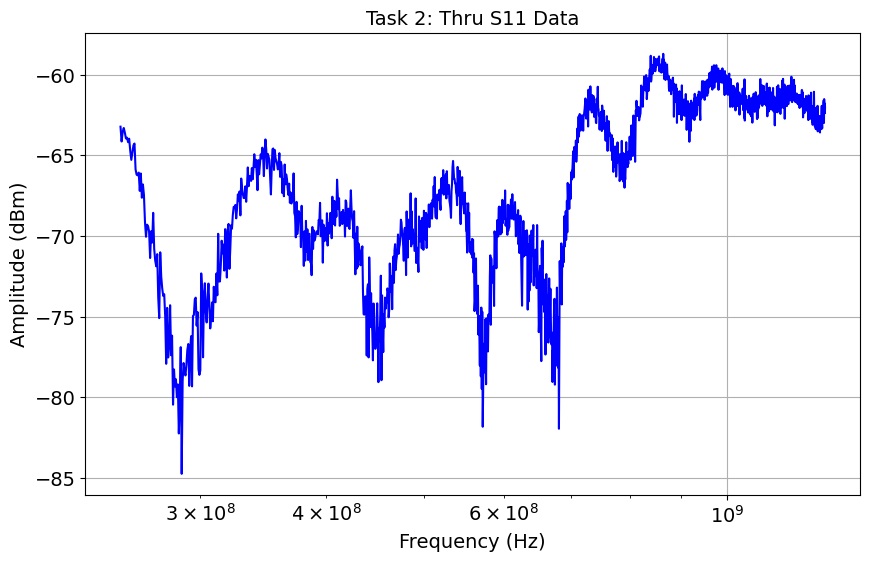

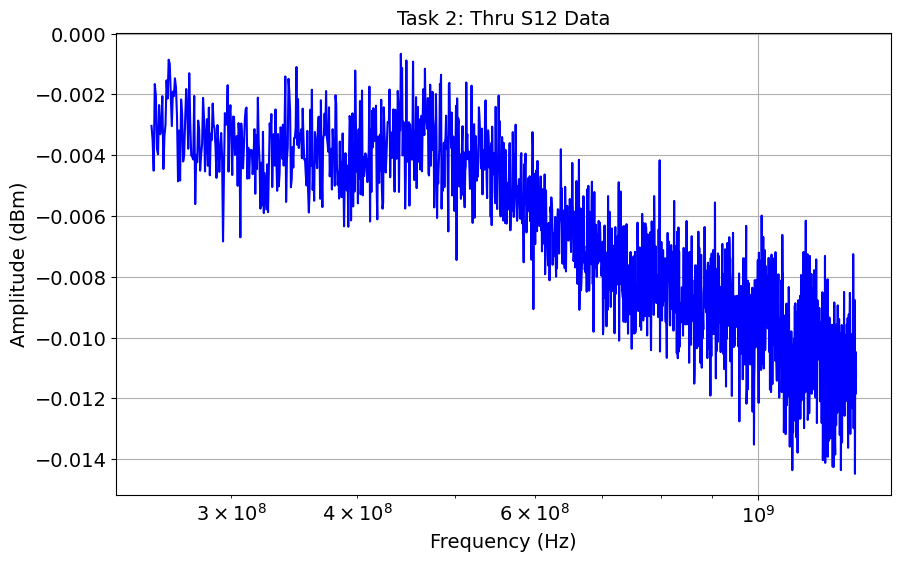

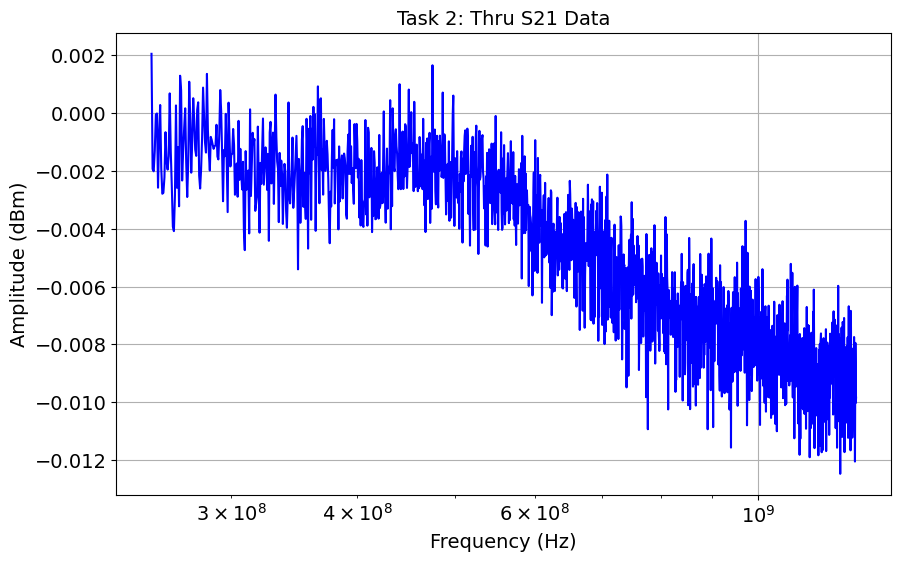

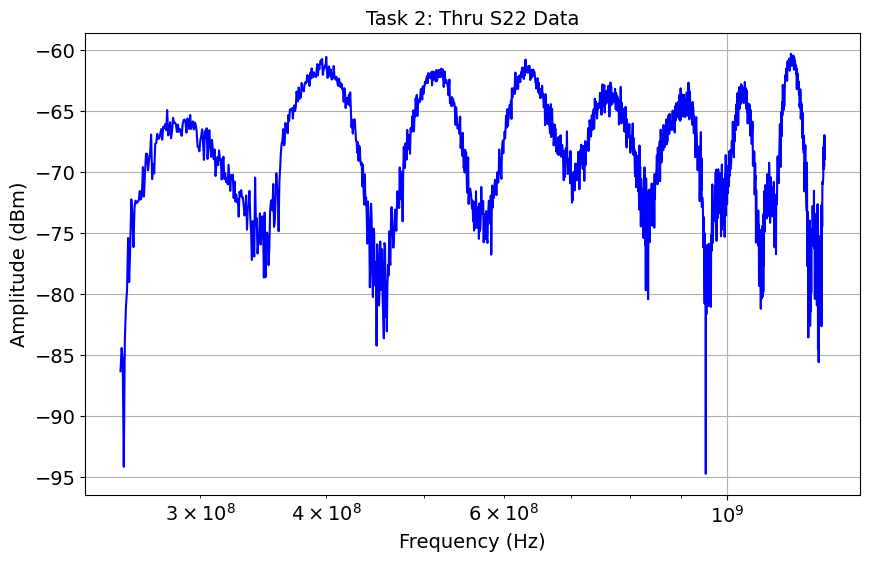

In [135]:
# Call the function for Task 2
plot_individual_files(combined_df, 'Task 2')

# Task 3: Measure an attenuator

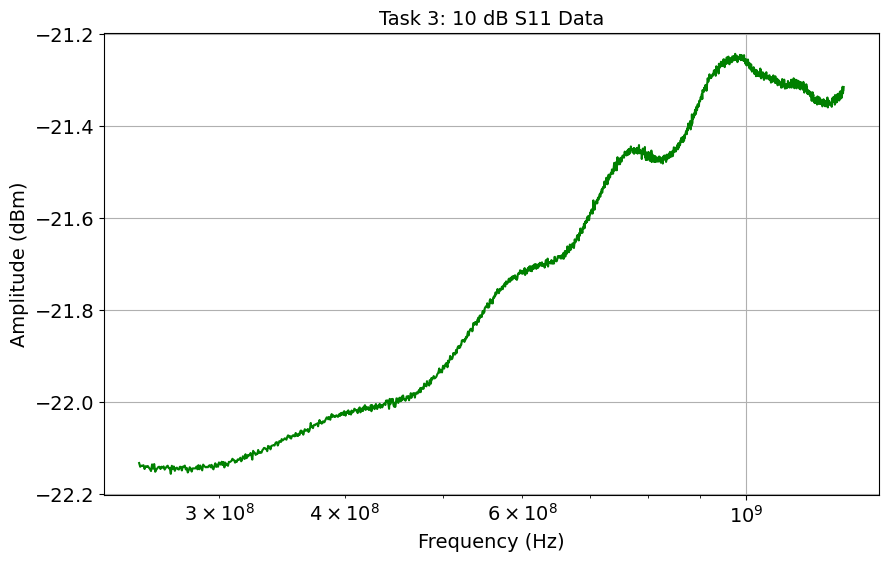

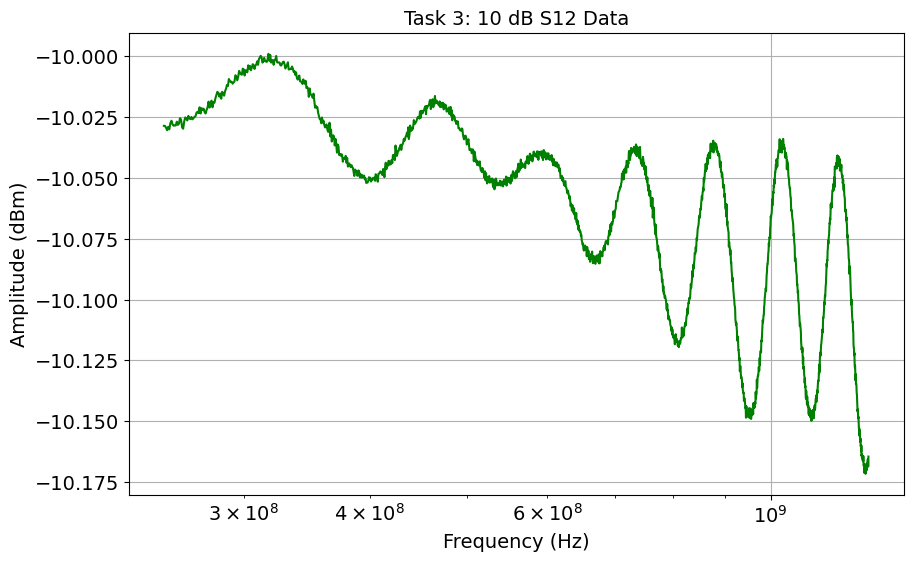

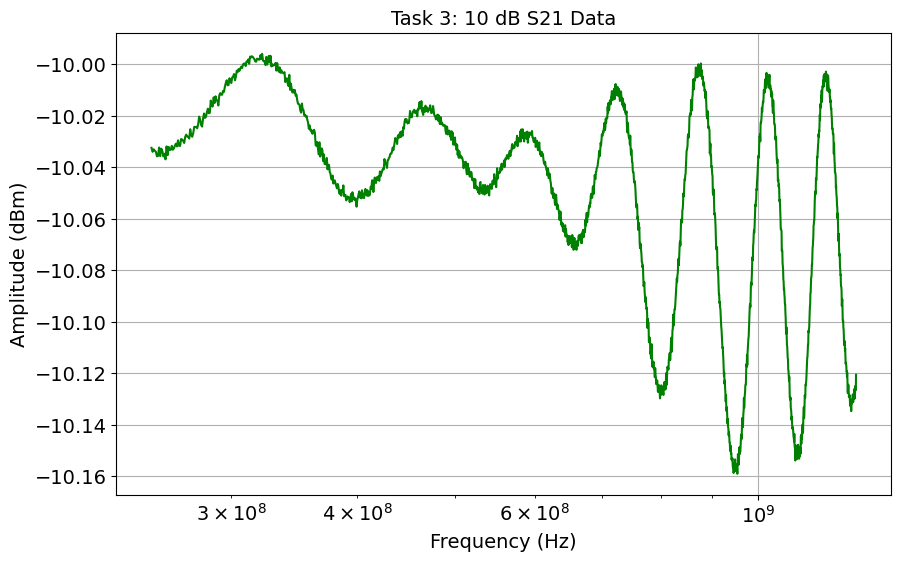

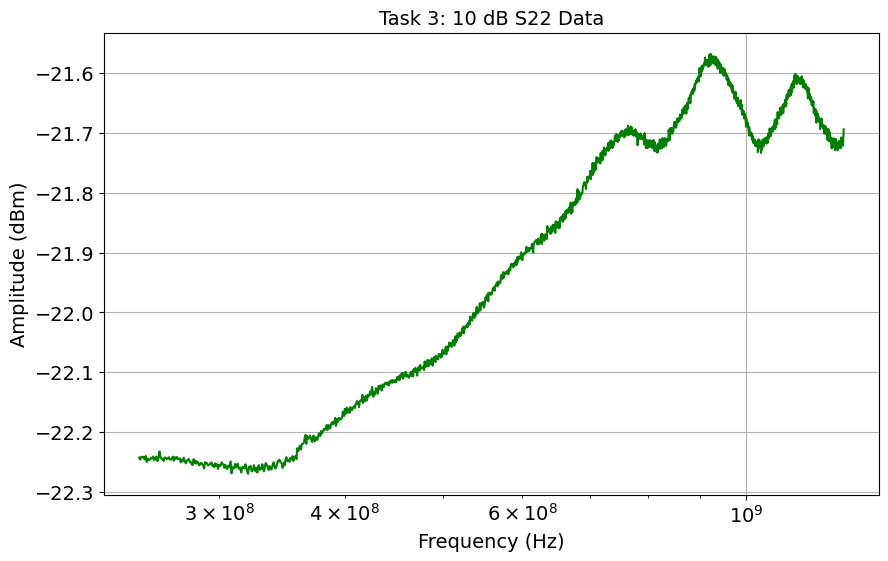

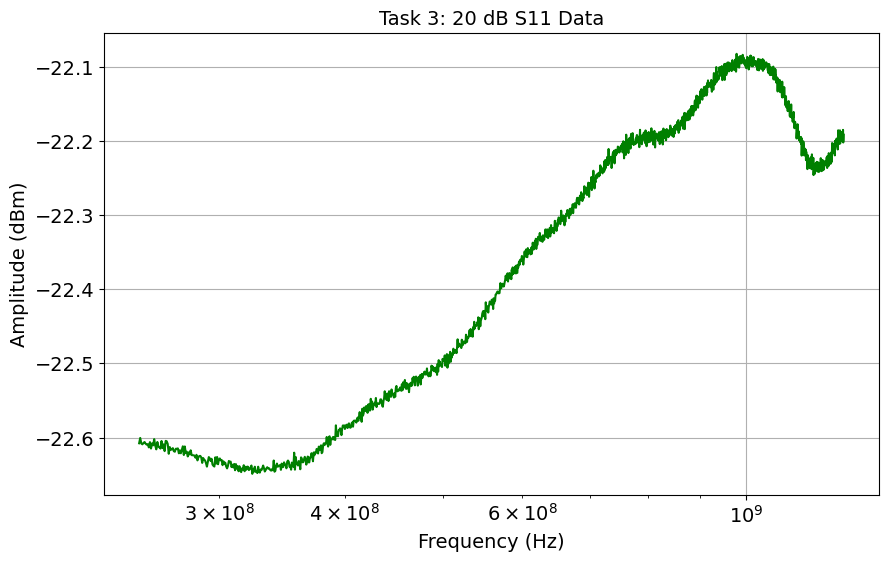

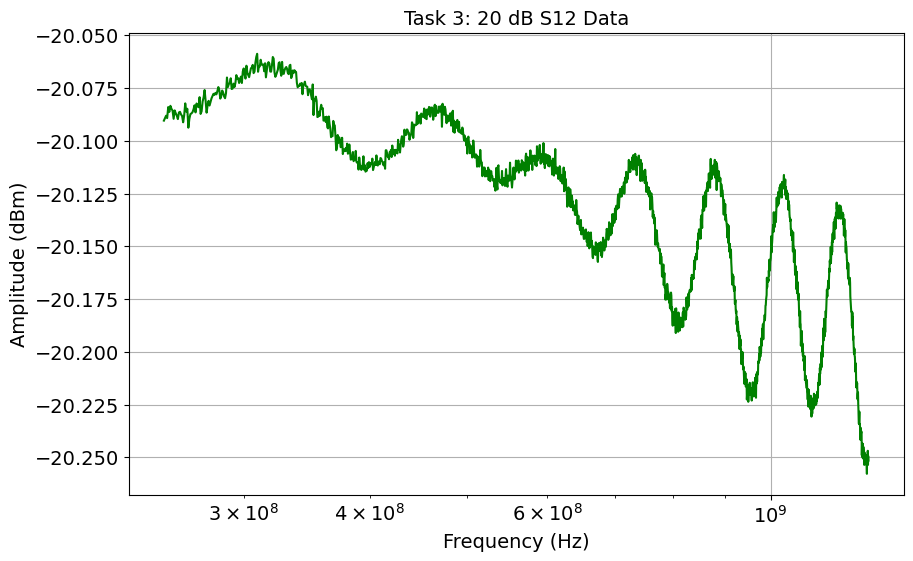

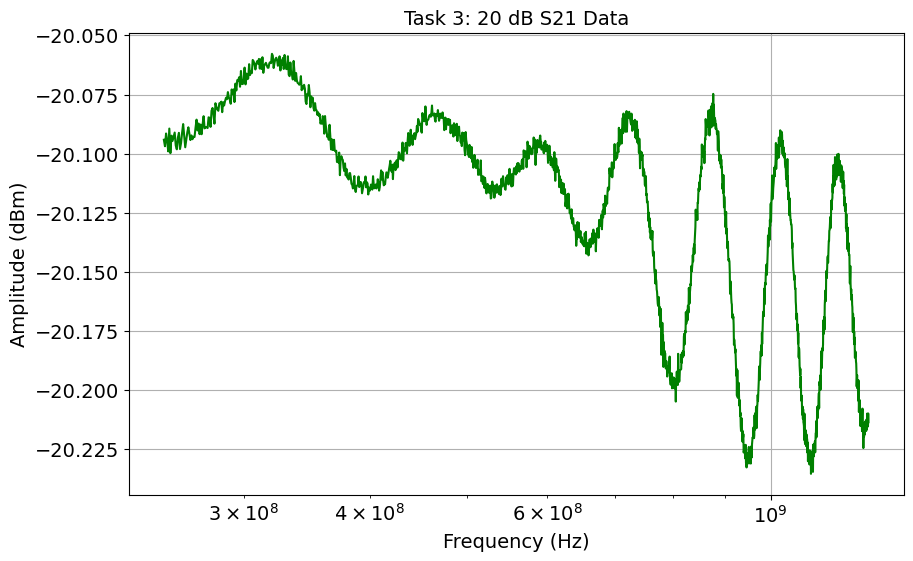

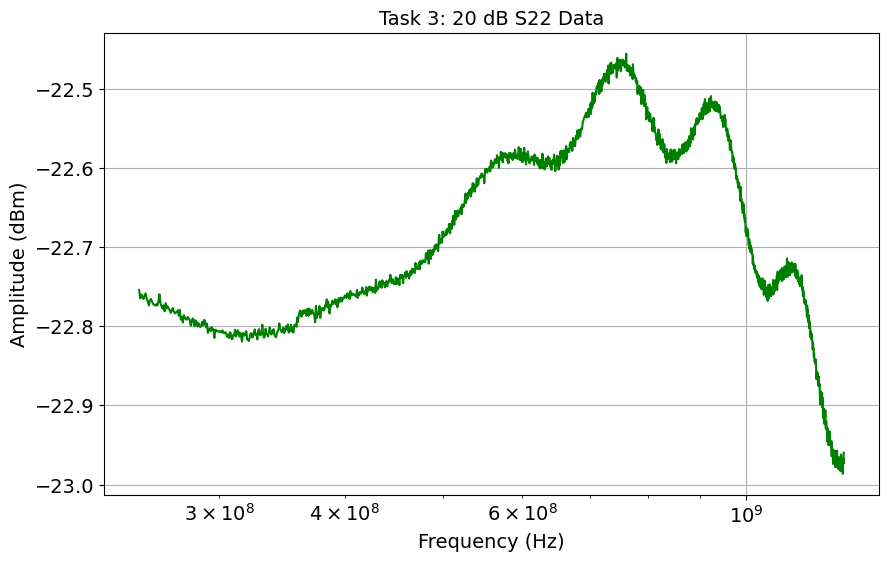

In [136]:
# Call the function for Task 3
plot_individual_files(combined_df, 'Task 3')

# Task 4: Measure a frequency-dependent passive device (HPF)

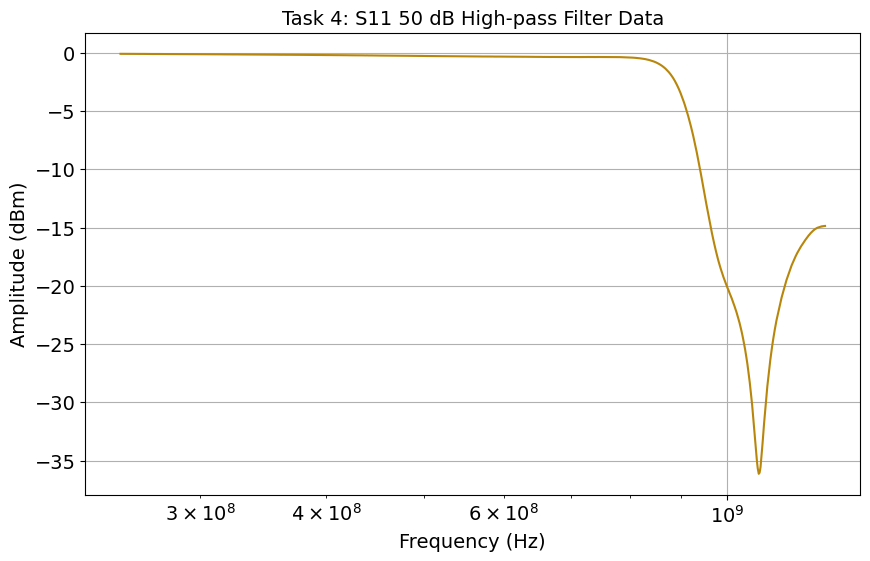

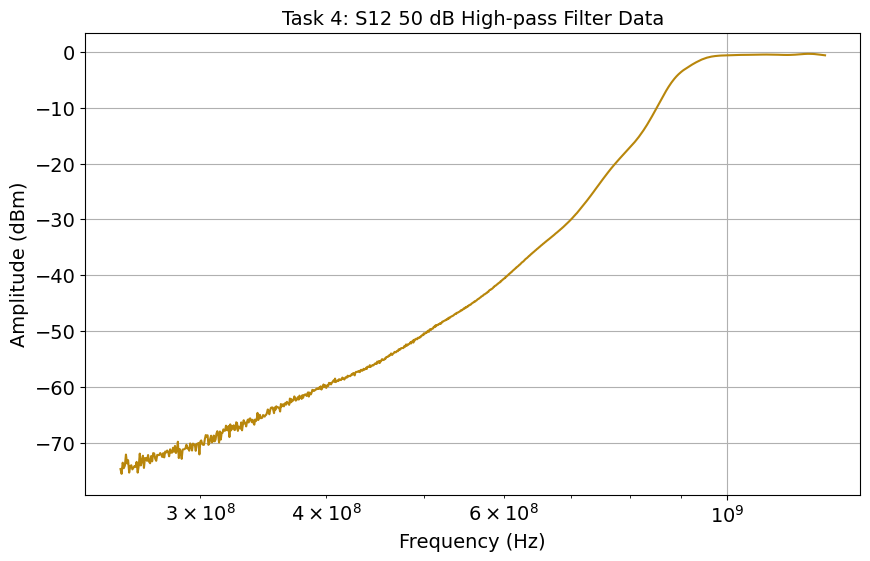

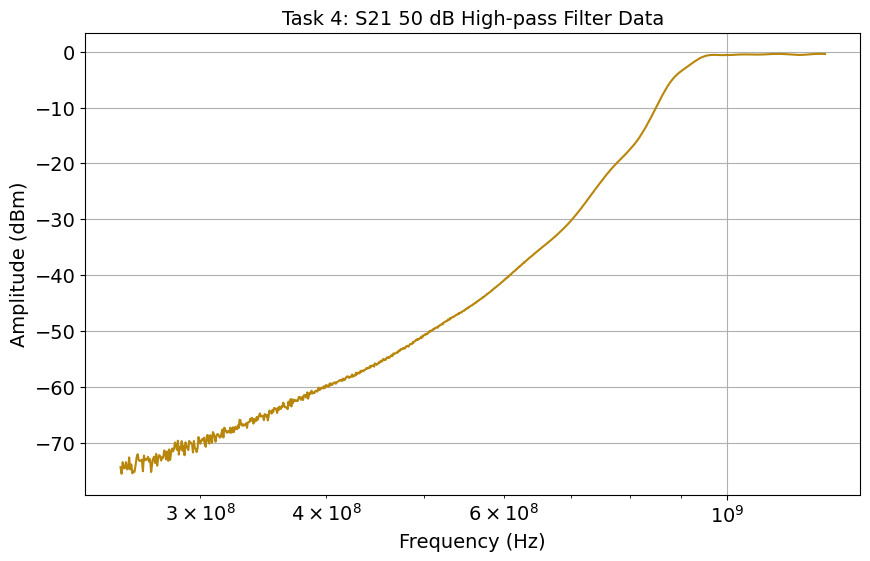

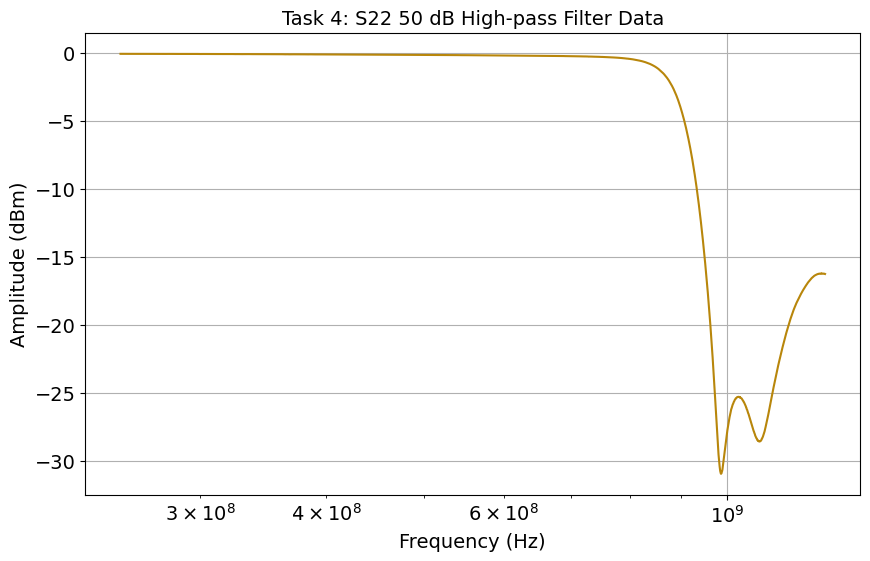

In [137]:
# Call the function for Task 4
plot_individual_files(combined_df, 'Task 4')

# Task 5: Measure a frequency-dependent active device (amplifier)

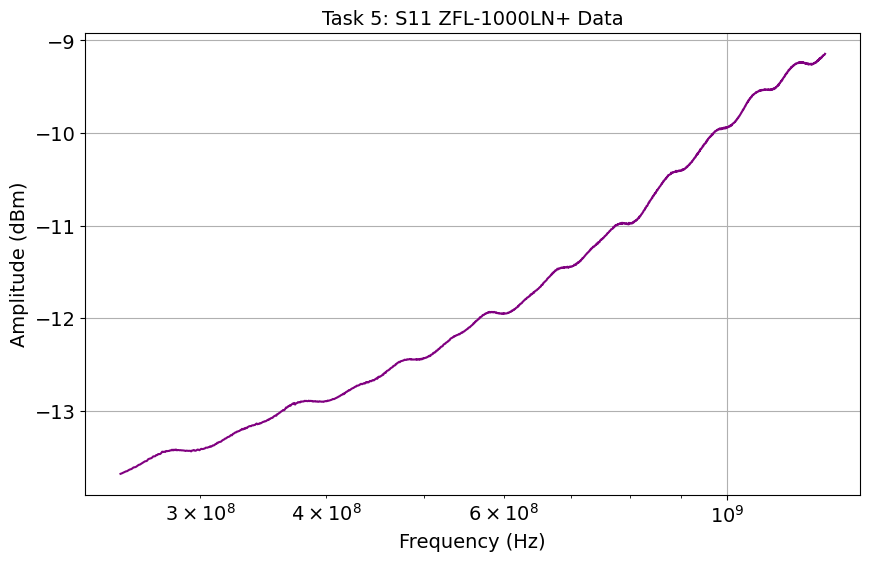

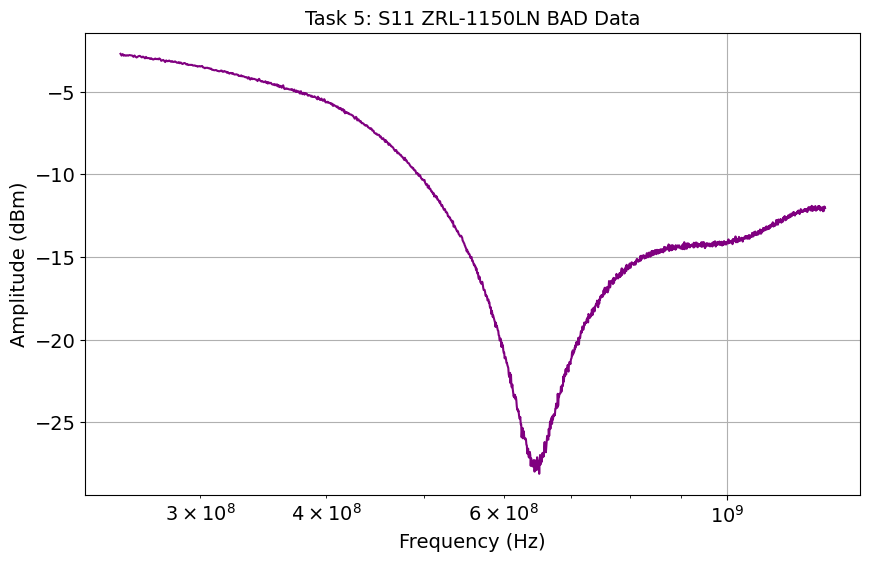

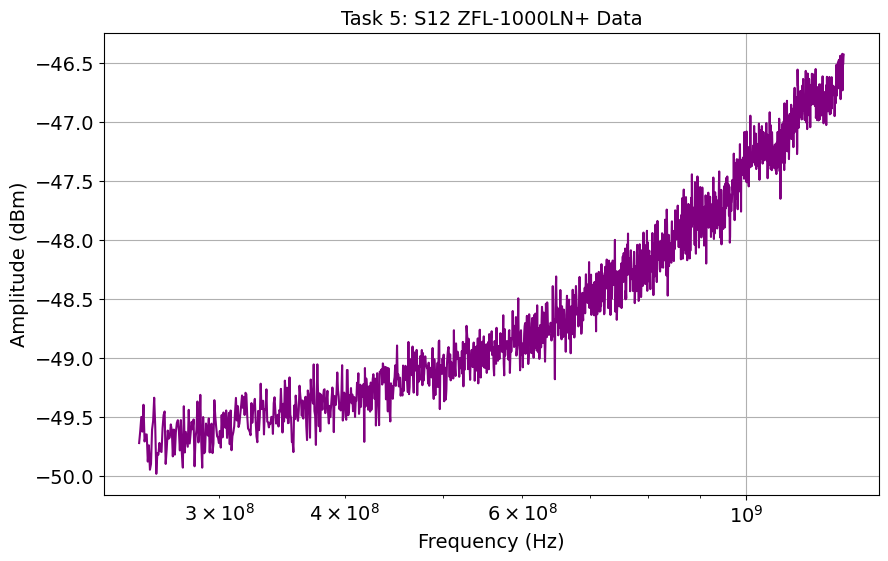

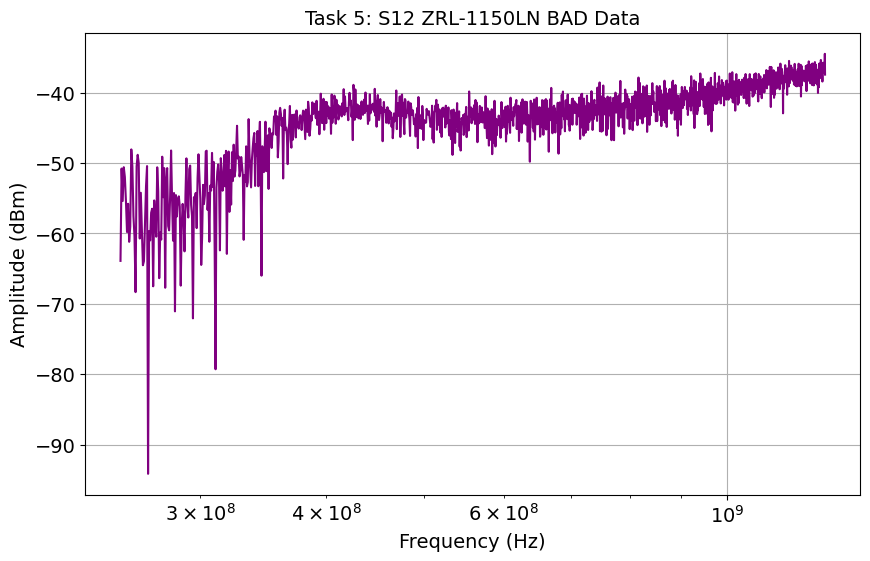

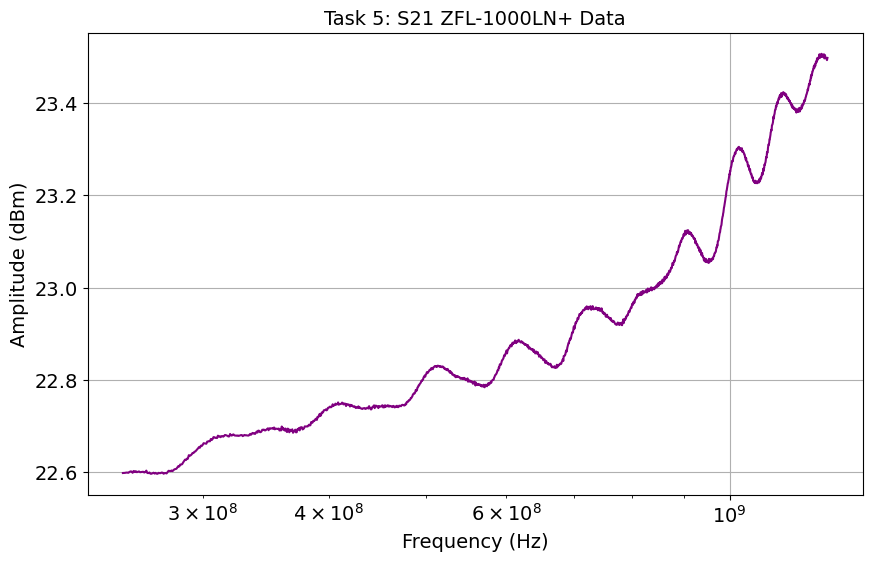

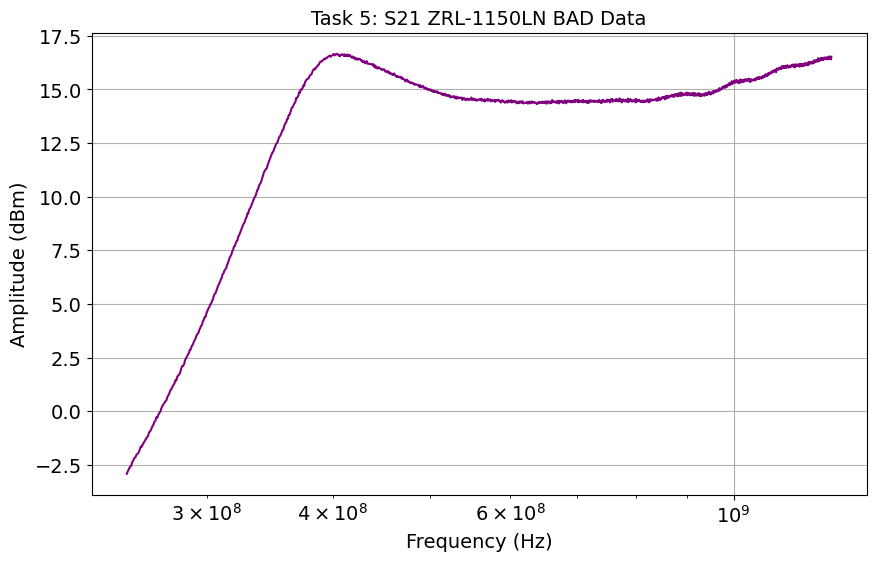

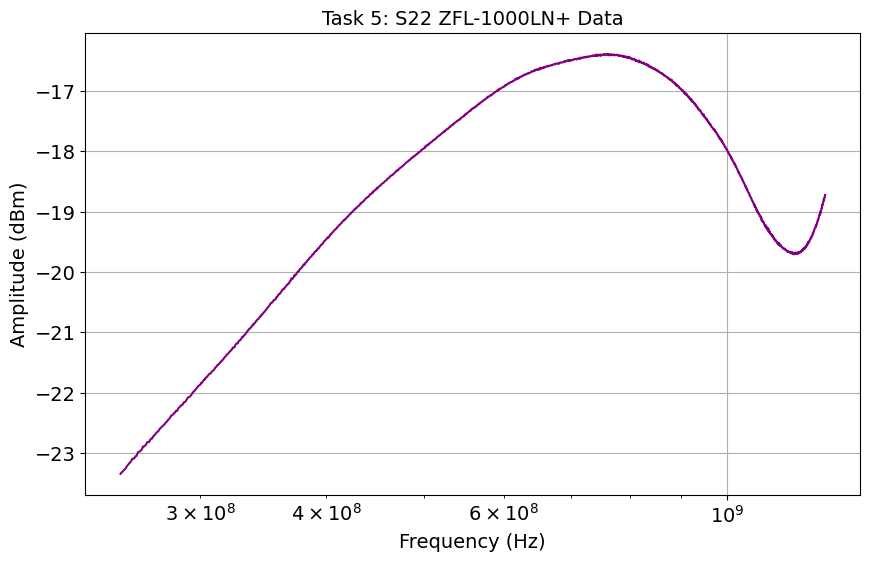

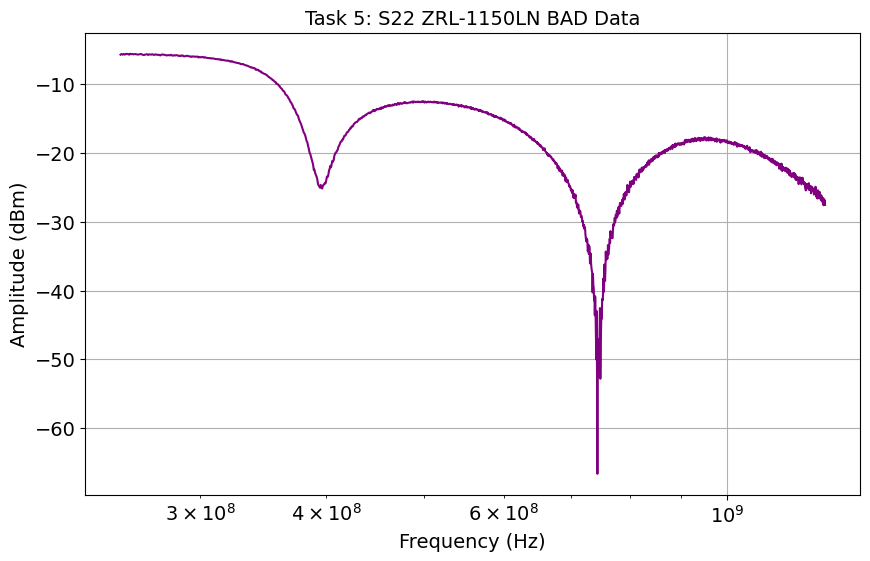

In [138]:
# Call the function for Task 5
plot_individual_files(combined_df, 'Task 5')